In [ ]:
import keras
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

imagesize=[224,224]
vgg=VGG16(input_shape=imagesize + [3],weights='imagenet',include_top=False)


for layer in vgg.layers:
    layer.trainable=False
x=Flatten()(vgg.output)

prediction=Dense(8,activation='softmax')(x)

model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
trainpath = 'train'
testpath='test'

training_set = train_datagen.flow_from_directory(trainpath,
                                                target_size = (224,224),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(testpath,
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')









Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [ ]:
training_set.class_indices

{'Anthracnose': 0,
 'algal leaf': 1,
 'bird eye spot': 2,
 'brown blight': 3,
 'gray light': 4,
 'healthy': 5,
 'red leaf spot': 6,
 'white spot': 7}

In [ ]:
data_gen_train = ImageDataGenerator(rescale=1/255.)

data_gen_valid = ImageDataGenerator(rescale=1/255.)

train_generator = data_gen_train.flow_from_directory(trainpath, target_size=(224,224), batch_size=32, class_mode="categorical")

valid_generator = data_gen_valid.flow_from_directory(testpath, target_size=(224,224), batch_size=32, class_mode="categorical")

model.fit(train_generator, epochs=2, validation_data=valid_generator) 

Found 744 images belonging to 8 classes.
Found 141 images belonging to 8 classes.
Epoch 1/2


C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\prashanth\AppData\Local\Temp\ipykernel_24940\3535500620.py", line 9, in <module>
      model.fit(train_generator, epochs=2, validation_data=valid_generator)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\prashanth\anaconda3\envs\tf\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,8] and labels shape [256]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_9220]

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img

import numpy as np

import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_dir = "tea sickness dataset"

In [ ]:
img_height,img_width=224,224
batch_size=32


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 885 files belonging to 8 classes.
Using 708 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 885 files belonging to 8 classes.
Using 177 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [ ]:
num_classes = 8


In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
23/23 [==============================] - 10s 332ms/step - loss: 1.8654 - accuracy: 0.2359 - val_loss: 1.2032 - val_accuracy: 0.4689
Epoch 2/15
23/23 [==============================] - 8s 310ms/step - loss: 1.0801 - accuracy: 0.5254 - val_loss: 1.5644 - val_accuracy: 0.4237
Epoch 3/15
23/23 [==============================] - 8s 292ms/step - loss: 1.0042 - accuracy: 0.6102 - val_loss: 0.9420 - val_accuracy: 0.6441
Epoch 4/15
23/23 [==============================] - 8s 312ms/step - loss: 0.7653 - accuracy: 0.7260 - val_loss: 1.0108 - val_accuracy: 0.5932
Epoch 5/15
23/23 [==============================] - 8s 306ms/step - loss: 0.5833 - accuracy: 0.7910 - val_loss: 0.9613 - val_accuracy: 0.6328
Epoch 6/15
23/23 [==============================] - 8s 288ms/step - loss: 0.5009 - accuracy: 0.8079 - val_loss: 0.8139 - val_accuracy: 0.7062
Epoch 7/15
23/23 [==============================] - 8s 281ms/step - loss: 0.3678 - accuracy: 0.8644 - val_loss: 0.8574 - val_accuracy: 0.7062
Epoch

In [ ]:
tf.keras.models.save_model(model,'tea.h5')

In [ ]:
from matplotlib import pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
filepath = './tea.h5'
model = load_model(filepath)
print(model)

print("Model Loaded Successfully")

Model Loaded Successfully


1/1 [==============================] - 0s 131ms/step
white spot


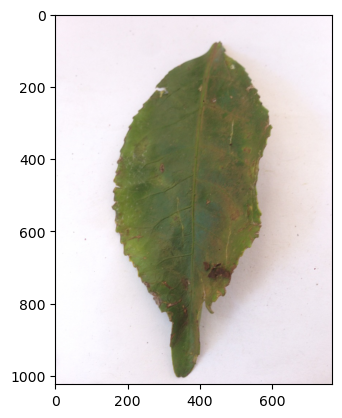

In [ ]:
def predict(test_img_path):
    test_image = load_img(test_img_path, target_size = (224,224)) # load image 

    test_image = img_to_array(test_image)#/255 # convert image to np array and normalize
    test_image = np.expand_dims(test_image, axis = 0)# change dimention 3D to 4D

    result = model.predict(test_image) # predict diseased palnt or not
    #print(result) 

    pred = np.argmax(result, axis=1)
    pred = pred[0]

    expression = ['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot','white spot']

    test_image = img.imread(test_img_path)
    print(expression[pred])
    plt.imshow(test_image)
predict('tea sickness dataset/white spot/UNADJUSTEDNONRAW_thumb_88.jpg')


1/1 [==============================] - 0s 32ms/step
algal leaf


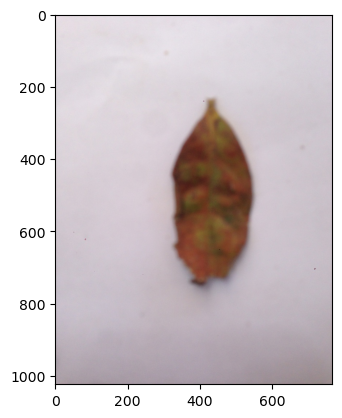

In [ ]:
predict("tea sickness dataset/algal leaf/UNADJUSTEDNONRAW_thumb_15.jpg")

1/1 [==============================] - 0s 32ms/step
Anthracnose


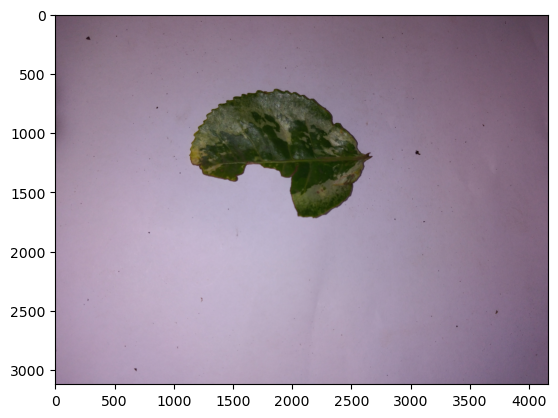

In [ ]:
predict("tea sickness dataset/Anthracnose/IMG_20220503_143725.jpg")

1/1 [==============================] - 0s 32ms/step
red leaf spot


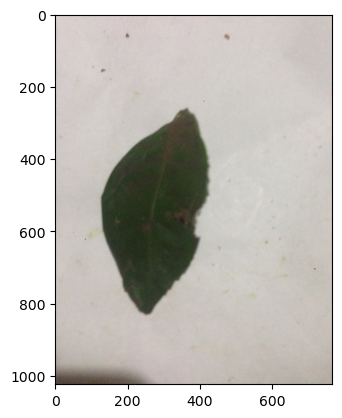

In [ ]:
predict("tea sickness dataset/red leaf spot/UNADJUSTEDNONRAW_thumb_18d.jpg")


1/1 [==============================] - 0s 29ms/step
healthy


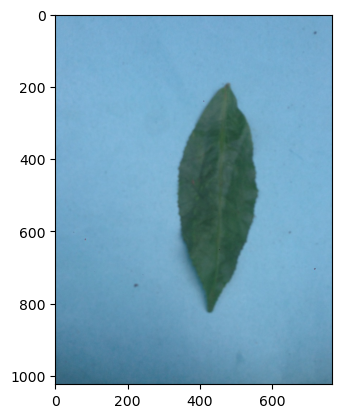

In [ ]:
predict("tea sickness dataset/healthy/UNADJUSTEDNONRAW_thumb_222.jpg")
